In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

def generate_bpsk_signal(num_samples, SNR_dB):
    bits = np.random.randint(0, 2, num_samples)
    symbols = 2 * bits - 1        //perform convolution of symbols with hn and hn1 differently

    noise = (1 / np.sqrt(2)) * (np.random.randn(num_samples) + 1j * np.random.randn(num_samples))
    SNR_linear = 10 ** (SNR_dB / 10.0)
    noise_power = np.var(symbols) / SNR_linear
    noisy_symbols = symbols + np.sqrt(noise_power) * noise
    return noisy_symbols

def generate_qpsk_signal(num_samples, SNR_dB):
    bits = np.random.randint(0, 4, num_samples)
    symbols = np.exp(1j * (np.pi / 4 + np.pi / 2 * bits))
    noise = (1 / np.sqrt(2)) * (np.random.randn(num_samples) + 1j * np.random.randn(num_samples))
    SNR_linear = 10 ** (SNR_dB / 10.0)
    noise_power = np.var(symbols) / SNR_linear
    noisy_symbols = symbols + np.sqrt(noise_power) * noise
    return noisy_symbols

In [ ]:
def extract_features(signal):
    features = np.vstack((np.real(signal), np.imag(signal))).T
    return features

In [ ]:
num_samples = 1000
SNR_dB = 10

bpsk_signal = generate_bpsk_signal(num_samples, SNR_dB)
qpsk_signal = generate_qpsk_signal(num_samples, SNR_dB)

bpsk_features = extract_features(bpsk_signal)
qpsk_features = extract_features(qpsk_signal)

bpsk_labels = np.zeros(num_samples)
qpsk_labels = np.ones(num_samples)

X = np.vstack((bpsk_features, qpsk_features))
y = np.hstack((bpsk_labels, qpsk_labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_train = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6340 - loss: 0.6400 - val_accuracy: 0.9400 - val_loss: 0.5100
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9117 - loss: 0.4720 - val_accuracy: 0.9425 - val_loss: 0.3374
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9324 - loss: 0.3080 - val_accuracy: 0.9425 - val_loss: 0.2293
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9264 - loss: 0.2270 - val_accuracy: 0.9475 - val_loss: 0.1903
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9224 - loss: 0.2100 - val_accuracy: 0.9450 - val_loss: 0.1789
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9319 - loss: 0.1896 - val_accuracy: 0.9425 - val_loss: 0.1698
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9244 - loss: 0.1907 - val_accuracy: 0.9450 - val_loss: 0.1641
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9346 - loss: 0.1677 - val_accuracy: 0.9400 - val_loss:

In [ ]:
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

y_pred = model.predict(X_test).flatten()
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


Test Loss: 0.1665
Test Accuracy: 94.50%
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       199
         1.0       0.95      0.94      0.94       201

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



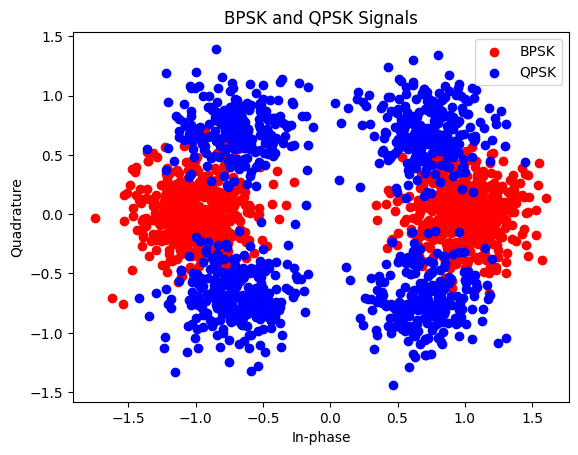

In [ ]:
plt.scatter(bpsk_features[:, 0], bpsk_features[:, 1], color='r', label='BPSK')
plt.scatter(qpsk_features[:, 0], qpsk_features[:, 1], color='b', label='QPSK')
plt.title("BPSK and QPSK Signals")
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.legend()